# Analisis y Clasificacion de Clientes para Campañas de Marketing

En este proyecto vas a aplicar tecnicas avanzadas de analisis de datos para resolver un problema de clasificacion de clientes en un conjunto de datos simulado.

El objetivo es identificar los distintos segmentos de clientes, basados en sus comportamientos de compra y caracteristicas demograficas para diseñar campañas de marketing mas efectivas.

## Descripcion del Proyecto
Este proyecto tiene como objetivo, utilizar tecnicas de analisis de datos y aprendizaje automatico para identificar diferentes segmentos de clientes, basados en sus comportamientos de compra y caracteristicas demograficas. Esto permitira desarrollar estrategias de marketing dirigidas y personalizadas. Vas a aplicar metodos de procesamiento de datos, reduciendo dimensiones y usaras tecnicas de clustering para analizar un conjunto simulado de clientes.

## Datos
Vas a utilizar un dataset sumulado, llamado `datos_clientes.scv` y que contiene informacion demografica y de comportamiento de compra de clientes, como la edad, los ingresos, los ingresos anuales, la puntuacion de gasto y la categoria de producto favorito.

## Consigna del proyecto
1. **Preprocesamiento de datos**: Cargar, limpiar y preparar el dataset para el analisis. Esto incluye la normalizacion de los datos para asegurar que las tecnicas de reduccion de dimensiones y clustering funcionen correctamente.
2. **Reduccion de dimensiones**: Utilizar **PCA** y **SVD** para reducir la cantidad de variables y descartar las caracteristicas mas importantes que influyen en el comportamiento del cliente.
3. **Clustering**: Implementar **K-Means** y **Clustering Jerarquico** para segmentar los clientes en gurpos basados en similitudes en sus datos. Esto ayudara a identificar patrones y tendencias entre diferentes tipos de clientes.
4. **Visualizacion de Datos**: Crear visualizaciones para interpretar los resultados de las tecnicas de reduccion de dimensiones y clustering. Esto incluye la creacion de **graficos de dispersion** para los resultados de PCA y la visualizacion de **dendrogramas** para el clustering jerarquico.
5. **Interpretacion y estrategias de Marketing**: Analizar los clusters obtenidos y desarrollar propuestas de estrategias de Marketing especificas para cada segmento de clientes. Deberas justificar tus estrategias basandote en las caracteristicas y comportamientos de los grupos identificados.

### 1. Preprocesamiento de Datos

In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Cargar los datos
data = pd.read_csv('/_DATA/customer_data.csv')
data.head()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar
2,3,46,46,23,Electrónica
3,4,32,28,66,Libros
4,5,60,81,27,Electrónica


In [3]:
# Ver informacion basica del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID Cliente                      200 non-null    int64 
 1   Edad                            200 non-null    int64 
 2   Ingresos Anuales (k$)           200 non-null    int64 
 3   Puntuación de Gasto (1-100)     200 non-null    int64 
 4   Categoría de Producto Favorito  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Ver la informacion de las estadisticas basicas del dataset
data.describe()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [6]:
# Normalizar los datos
escalador = MinMaxScaler()
data_escalada = escalador.fit_transform(data[['Edad', 'Ingresos Anuales (k$)', 'Puntuación de Gasto (1-100)']])
data_escalada

array([[0.74509804, 0.6969697 , 0.46938776],
       [1.        , 0.71717172, 0.86734694],
       [0.54901961, 0.26262626, 0.2244898 ],
       [0.2745098 , 0.08080808, 0.66326531],
       [0.82352941, 0.61616162, 0.26530612],
       [0.1372549 , 0.36363636, 0.01020408],
       [0.39215686, 0.96969697, 0.90816327],
       [0.74509804, 0.50505051, 0.16326531],
       [0.35294118, 0.43434343, 0.32653061],
       [0.43137255, 0.23232323, 0.08163265],
       [0.19607843, 0.78787879, 0.42857143],
       [0.19607843, 0.58585859, 0.47959184],
       [0.45098039, 0.31313131, 0.3877551 ],
       [0.68627451, 0.95959596, 0.93877551],
       [0.76470588, 0.87878788, 0.41836735],
       [0.45098039, 0.51515152, 0.25510204],
       [0.03921569, 0.61616162, 1.        ],
       [0.41176471, 0.57575758, 0.5       ],
       [0.01960784, 0.51515152, 0.24489796],
       [0.45098039, 0.11111111, 0.23469388],
       [0.84313725, 0.38383838, 0.12244898],
       [0.56862745, 0.01010101, 0.60204082],
       [0.

### 2. Reduccion de Dimensiones: PCA y SVD

In [7]:
# Aplicar PCA
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(data_escalada)

In [9]:
# Aplicar SVD
U, Sigma, VT = np.linalg.svd(data_escalada)

In [10]:
# Seleccionar los 2 primeros componentes singulares para reduccion de dimensiones
k = 2
svd_resultador = U[:,:k] * Sigma[:k]

### 3. Clustering: K-Means y Clustering Jerarquico

In [11]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_escalada)

In [12]:
# Aplicar Clustering Jerarquico
linked = linkage(data_escalada, 'ward')

### 4. Visualizacion de Datos

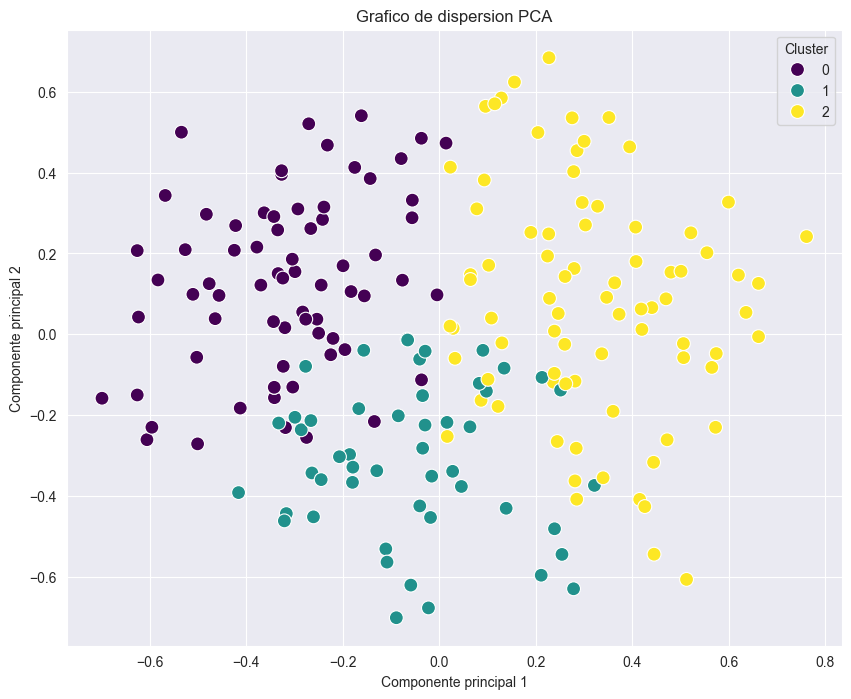

In [13]:
# Crear un grafico de dispersion para los resultados de PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x = pca_resultados[:,0], y = pca_resultados[:,1], hue = kmeans_clusters, palette = 'viridis', s=100)
plt.title('Grafico de dispersion PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Cluster')
plt.grid(True)

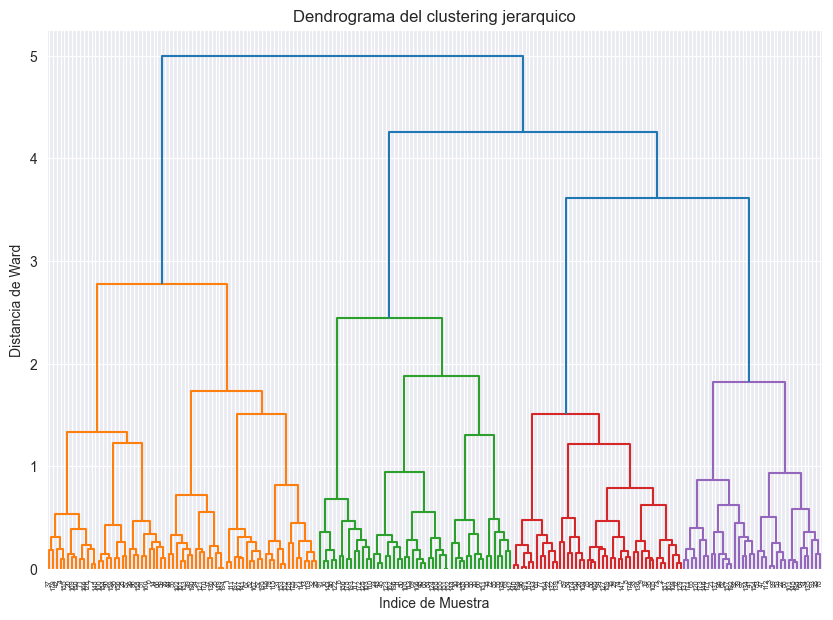

In [14]:
# Crear un dendrograma del clustering jerarquico
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma del clustering jerarquico')
plt.xlabel('Indice de Muestra')
plt.ylabel('Distancia de Ward')
plt.axhline(y = 10, color = 'r', linestyle = '--');

### 5. Interpretacion y Estrategias de Marketing basadas en los Clusters

In [15]:
# Escribe un loop que te permita mostrar los datos basicos de los diferentes clusters, como:
## su edad media
## sus ingresos medios
## su puntuacion de gastos media

# Analisis de cluesters para determinar estrategias
cluster_info = pd.DataFrame({
    'Cluster': kmeans_clusters,
    'Edad': data['Edad'],
    'Ingresos': data['Ingresos Anuales (k$)'],
    'Gasto': data['Puntuación de Gasto (1-100)']
})

# Descripcion de cada cluster
for cluster in cluster_info['Cluster'].unique():
    cluster_data = cluster_info[cluster_info['Cluster'] == cluster]
    print(f'Cluster {cluster}:')
    print(f' - Edad media: {cluster_data["Edad"].mean():.0f}')
    print(f' - Ingresos medios: {cluster_data["Ingresos"].mean():.2f}')
    print(f' - Puntuacion de Gasto media: {cluster_data["Gasto"].mean():.2f}')
    print()

Cluster 2:
 - Edad media: 50
 - Ingresos medios: 97.33
 - Puntuacion de Gasto media: 62.00

Cluster 0:
 - Edad media: 43
 - Ingresos medios: 52.51
 - Puntuacion de Gasto media: 20.17

Cluster 1:
 - Edad media: 34
 - Ingresos medios: 49.08
 - Puntuacion de Gasto media: 72.20



Con base en la información proporcionada sobre los clusters, podemos desarrollar estrategias de Marketing diferenciadas para cada segmento de clientes. Cada estrategia debe estar orientada a las caracteristicas particulares y comportamientos de compra observados en cada grupo:

## Estrategias de Marketing para cada Cluster
### Cluster 0: Clientes mayores con altos ingresos y gasto moderado
#### Estrategia Propuesta:
1. **Productos premium y de lujo**: Dada la combinacion de alta edad e ingresos elevados, este grupo podria estar interesado en productos o servicios de alta calidad y lujo. La oferta podria incluir articulos exclusivos o de edicion limitada.
2. **Comunicacion personalizada y directa**: Considerar el uso de medios tradicionales(como correo postal personalizado o llamadas telefonicas), combinados con estrategias digitales como emails prsonalizados. El enfoque debe ser sofisticado y directo, respetando su madurez y experiencia de compra.
3. **Programas de fidelidad**: Crear o mejorar programas de fidelidad que ofrecen beneficios exclusivos, descuentos en productos premium, y servicios especiales como entregas prioritarias o acceso anticipado a nuevos productos.

### Cluster 1: Clientes de edad media con ingresos y gastos bajos
#### Estrategia Propuesta:
1. **Ofertas y descuentos**: Este segmento parece ser mas sensible al precio, debido a sus ingresos mas bajos y baja puntuacion de gasto. Las campañas promocionales, descuentos y cupones podrian ser efectivos para impulsar las compras.
2. **Marketing de contenido educativo**: Proporcionar contenido que eduque sobre la relacion costo-beneficio de los productos, ayudando a este grupo a tomar desiciones de compra informadas que maximicen el valor por su dinero.
3. **Programas de recompensas por referencias**: Incentivar a los clientes a referir amigos y familiares a cambio de beneficios, lo cual puede ayudar a expandir la base de clientes de manera organica y a bajo costo.

### Cluster 2: Clientes jovenes con ingresos moderados y gasto alto
#### Estrategia Propuesta:
1. **Marketing digital intensivo**: Dado que este grupo es joven y activo en compras, es crucial usar plataformas digitales para el marketing. Redes sociales, publicidad online, y campañas de influencer marketing pueden ser muy efectivas.
2. **Productos y servicios inovadores**:  Ofrecer productos tecnologicos, de moda y otros bienes que apelen a un estilo de vida dinamico y moderno.
3. **Experiencias y eventos exclusivos**: Organizar eventos o experiencias exclusivas que puedan atraer a este grupo demografico, como lanzamientos de productos, concursos, meet-ups que les permitan interactuar con la marca de manera significativa.

## Justificacion:

Las estrategias esta diseñadas para alinearse con las caractersticas y preferencias de cada grupo:

- **Cluster 0**: Se enfoca en calidad y exclusividad, apropiadas para su capacidad de gasto y preferencias de consumo maduro.
- **Cluster 1**: Se centra en maximizar el valor y accesibilidad, crucial para clientes con menor liquidez.
- **Cluster 2**: Aprovecha su familiaridad con la tecnologia y tendencias, usando canales y ofertas que resuenen con su estilo de vida activo y moderno.

Estas estrategias no solo buscan aumentar las ventas, sino que tambien ayudan a mejorar la experiencia de compra del cliente y aumentar su satisfaccion con la marca.
